# Hello Creative Coding NYC!

Import what we will use

In [120]:
import os
import numpy as np

from keras.applications import InceptionV3
from keras.applications.inception_v3 import decode_predictions

from keras.preprocessing import image

Using TensorFlow backend.


Use the `Inception3` image recognition model

In [121]:
model = InceptionV3(weights='imagenet',
                    include_top=True,
                    input_shape=(150, 150, 3))

Show the model architecture

In [31]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              (None, 74, 74, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_95 (BatchNo (None, 74, 74, 32)   96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_95 (Activation)      (None, 74, 74, 32)   0           batch_normalization_95[0][0]     
__________________________________________________________________________________________________
conv2d_96 

I have several images ready for identifying

In [125]:
images = [
  'panda.jpg', # 0 
  'cat.jpg',   # 1
  'dog.jpg',   # 2
  'bunny.jpg',  # 3
  'nature.jpg' # 4
]

Pick an image to identify

In [126]:
image_index = 4

Set correct image path

In [127]:
base_dir = '../../images'
img_path = os.path.join(base_dir, images[image_index])

print('Using:', images[image_index])

Using: nature.jpg


Transform image into tensor

In [128]:
img = image.load_img(img_path, target_size=(150, 150))

img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.

See what the tensor looks like

In [129]:
img_tensor.shape

(1, 150, 150, 3)

In [130]:
# img_tensor

### Make the prediction

In [131]:
prediction = model.predict(img_tensor)

See what the prediction looks like

In [132]:
# prediction

In [133]:
# prediction[0][:20]

Decode the prediction

In [134]:
decode_predictions(prediction, top=3)

[[('n11879895', 'rapeseed', 0.99999547),
  ('n03028079', 'church', 2.9930002e-06),
  ('n07802026', 'hay', 5.6437267e-07)]]

Now go back and choose a different image to identify

# UNRELATED -- image color extraction

In [141]:
from PIL import Image
import struct
import numpy as np
import scipy
import scipy.misc
import scipy.cluster

NUM_CLUSTERS = 3


In [142]:


print('reading image')
im = Image.open('../../images/nature.jpg')
im = im.resize((150, 150))      # optional, to reduce time
ar = np.asarray(im)
shape = ar.shape
ar = ar.reshape(scipy.product(shape[:2]), shape[2]).astype(float)


reading image


In [143]:


print('finding clusters')
codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
print('cluster centres:\n', codes)

def round_codes(codes):
  return np.round(codes)
  
codes = (round_codes(codes))
  
vecs, dist = scipy.cluster.vq.vq(ar, codes)         # assign codes
counts, bins = scipy.histogram(vecs, len(codes))    # count occurrences

index_max = scipy.argmax(counts)                    # find most frequent
peak = codes[index_max]


finding clusters
cluster centres:
 [[ 175.58177734  180.41457251  157.90621929]
 [  47.47522465   74.74518614   51.88241335]
 [  45.08461843  159.1585607    13.61631739]]


In [144]:
c = ar.copy()
for i, code in enumerate(codes):
    c[scipy.r_[scipy.where(vecs == i)], :] = code
lol = c.reshape(*shape)

In [145]:
lol = lol.astype(int)

In [146]:
lol.shape

(150, 150, 3)

In [147]:
# from scipy.misc import toimage
# toimage(lol).show()

In [148]:
def imshow(img):
    import cv2
    import IPython
    _,ret = cv2.imencode('.jpg', img) 
    i = IPython.display.Image(data=ret)
    IPython.display.display(i)

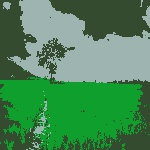

In [149]:
imshow(lol)